# Obje Tespiti

In [39]:
!pip install -q sounddevice
!pip install mediapipe -q -i https://test.pypi.prg/simple/mediapipe==0.9.3.2

In [40]:
from mediapipe import solutions # el tespiti için görsel işleme görevlerini
from mediapipe.framework.formats import landmark_pb2 #"landmark_pb2" formatı cinsinden verileri almak için
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [41]:
MARGIN = 10 #"Metinin üst köşesinden elin sınırına olan mesafe"
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88,205,54) # rgb formatında yeşil renk

In [42]:
import urllib.request

url = "https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task"
filename = "hand_landmarker.task"

urllib.request.urlretrieve(url, filename)

('hand_landmarker.task', <http.client.HTTPMessage at 0x215032a84c0>)

In [43]:
#!powershell -command "& { Invoke-WebRequest -Uri 'https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task' -OutFile 'hand_landmarker.task' }"

In [44]:
#!wget -q https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task

In [45]:
base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
options = vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [46]:
import urllib.request

url = "https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg"
filename = "data/el_ornek_1.jpg"

urllib.request.urlretrieve(url, filename)

('data/el_ornek_1.jpg', <http.client.HTTPMessage at 0x215032a8190>)

In [47]:
#!wget -q -0 data/el_ornek_1.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

In [48]:
img = cv2.imread("data/el_ornek_1.jpg")

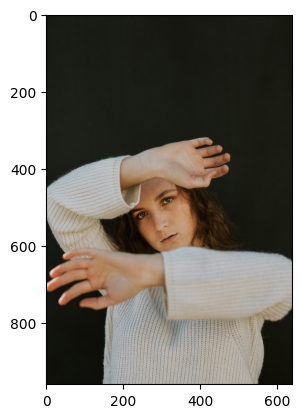

In [49]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [50]:
img.shape

(960, 640, 3)

In [51]:
image = mp.Image.create_from_file("data/el_ornek_1.jpg")
detection_result = detector.detect(image)

In [55]:
    def draw_landmarks_on_image (rgb_image, detection_result):
        hand_landmarks_list = detection_result.hand_landmarks #tespit edilen elin işaretlendirmelerini içerir
        handedness_list = detection_result.handedness # tespit edilen eli sağ ve sol olma durumu
        annotated_image= np.copy(rgb_image) #girdi görüntüsü kopyalanır.
        #tespit edilen elleri işaretlemek için bir döngü oluşturulur.
        for idx in range (len (hand_landmarks_list)):
            hand_landmarks = hand_landmarks_list [idx] #indeksi kullanarak el işaretlemelerini alır.
            handedness = handedness_list[idx] #indeksi kullanarak hangi elin tespit edildiği
            
            hand_landmarks_proto= landmark_pb2.NormalizedLandmarkList() #"landmark_pb2" formatında bir liste oluşturur.
            hand_landmarks_proto. landmark.extend([
                landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark. y, z=landmark.z) for landmark in hand_landmarks])
            solutions.drawing_utils.draw_landmarks( #el işaretlemeleri görüntü üzerine çizilir.
                annotated_image,
                hand_landmarks_proto,
                solutions.hands.HAND_CONNECTIONS,
                solutions.drawing_styles.get_default_hand_landmarks_style(),
                solutions.drawing_styles.get_default_hand_connections_style())
            
            height,width,_=annotated_image.shape
            x_coordinates = [landmark.x for landmark in hand_landmarks]
            y_coordinates = [landmark.y for landmark in hand_landmarks]
            text_x = int(min (x_coordinates) *width)
            text_y= int(min (y_coordinates) *height)-MARGIN

            cv2.putText (annotated_image, f" {handedness [0].category_name}", (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                        FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)
        return annotated_image

In [53]:
image.numpy_view()

array([[[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       ...,

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [16, 16,  8],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [15, 15,  7],
        [15, 15,  7]]], dtype=uint8)

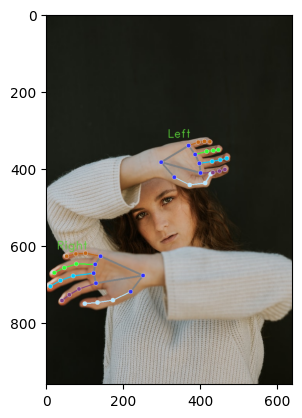

In [56]:
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)

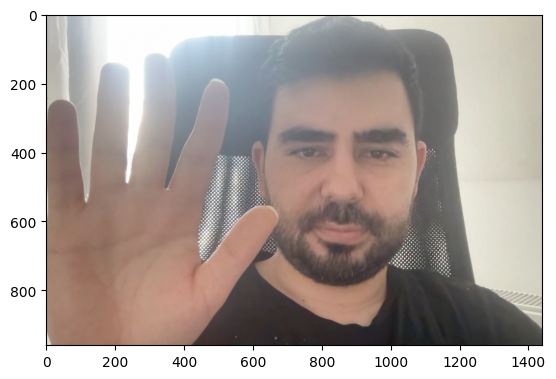

In [58]:
img = cv2.imread("data/el_ornek_2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [59]:
image = mp.Image.create_from_file("data/el_ornek_2.jpg")
detection_result = detector.detect(image)

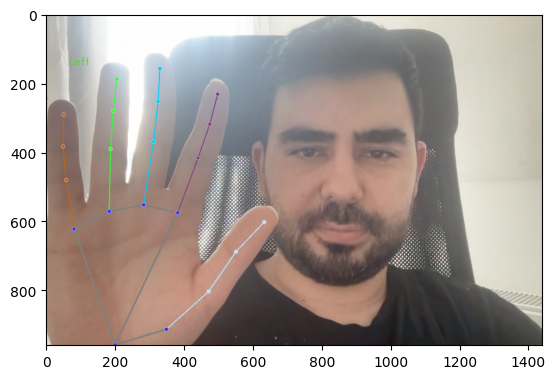

In [60]:
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)